In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import csv
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from keras import models, layers, optimizers, regularizers
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from keras import regularizers
%matplotlib inline

Using TensorFlow backend.


### Import datasets
- We will import train, test1 and test2 dataset
- Merge test1 and train dataset, in order to expend our train dataset

In [2]:
raw_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
raw_test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
raw_test2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
raw_df.head(20)
raw_df.columns

Index(['addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft',
       'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat',
       'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway',
       'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher',
       'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer',
       'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden',
       'has_childrens_playroom', 'rent', 'no_fee', 'description',
       'neighborhood', 'borough', 'unit', 'floornumber', 'line'],
      dtype='object')

## Data Explore

In [3]:
raw_df.describe()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
count,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.199900e+04,1.200000e+04,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,10723.000000
mean,1.529133e+06,1.657667,1.239500,850.465750,10682.779667,40.727507,-73.956837,2.370093e+06,2.287120e+09,10.266608,...,0.271667,0.170000,0.264083,0.208583,0.073167,0.132083,0.090500,3605.762917,0.490000,6.182738
std,4.301123e+06,1.079771,0.560208,515.773101,593.370964,0.053241,0.043024,1.242919e+06,1.202105e+09,12.019787,...,0.444837,0.375648,0.440862,0.406313,0.260421,0.338595,0.286909,2897.069446,0.499921,7.671545
min,7.300000e+01,0.000000,0.000000,0.000000,10001.000000,40.573898,-74.141570,1.000000e+06,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000,0.000000,0.000000
25%,6.209200e+04,1.000000,1.000000,610.000000,10023.000000,40.693256,-73.986076,1.052139e+06,1.011220e+09,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,2.000000
50%,2.495815e+05,2.000000,1.000000,800.000000,11103.000000,40.729028,-73.961700,3.019358e+06,3.006580e+09,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,3.000000
75%,8.225132e+05,2.000000,1.000000,1000.000000,11218.000000,40.764599,-73.936663,3.326098e+06,3.050580e+09,12.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3900.000000,1.000000,6.000000
max,1.877210e+07,8.000000,20.000000,10000.000000,11694.000000,40.909842,-73.730550,5.158986e+06,5.010640e+09,90.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,78.000000


In [4]:
raw_df.shape

(12000, 38)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 7236931 to 7422694
Data columns (total 38 columns):
addr_unit                 11909 non-null object
building_id               12000 non-null int64
bedrooms                  12000 non-null int64
bathrooms                 12000 non-null float64
size_sqft                 12000 non-null float64
created_at                12000 non-null object
addr_street               12000 non-null object
addr_city                 12000 non-null object
addr_zip                  12000 non-null int64
addr_lat                  12000 non-null float64
addr_lon                  12000 non-null float64
bin                       11999 non-null float64
bbl                       12000 non-null int64
floor_count               12000 non-null float64
year_built                11597 non-null float64
min_to_subway             11874 non-null float64
has_doorman               12000 non-null int64
has_elevator              12000 non-null int64
has_fireplace    

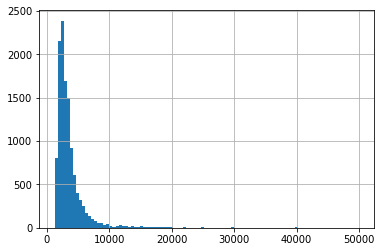

In [6]:
raw_df['rent'].hist(bins=100)

### Seperate all features into continuous, categorical and binary features.

For those none relatived features as below, we have excluded them from the features grouping: 
- addr_unit: no relationship
- building_id: no relationship
- addr_lat: hard to analyze latitude
- addr_lon: hard to analyze longtitude
- bin: need to wait for external dataset
- bbl: need to wait for external dataset
- description: hard to build a NLP model
- unit: no relationship


In [7]:
continuous_features =['bathrooms','bedrooms','size_sqft','floor_count','year_built','min_to_subway','floornumber' ]
caterigal_features =['addr_street','addr_city','addr_zip','neighborhood','borough','line' ]
binary_features = ['has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher','is_furnished', 'has_gym', 'allows_pets', 
                   'has_washer_dryer','has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden',
                   'has_childrens_playroom', 'no_fee', ]

## Import external dataset from Internal Revenue Service
 - We will import the 2017 individual income Tax statistic dataset from IRS website(https://www.irs.gov/pub/irs-soi/17zpallagi.csv).
 - We will expend a new feature: **average_income** based on zipcode to our raw dataset 

In [8]:
raw_income_data=pd.read_csv('https://www.irs.gov/pub/irs-soi/17zpallagi.csv', index_col=0)
raw_income_data.columns

Index(['STATE', 'zipcode', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'ELF',
       'CPREP', 'PREP',
       ...
       'N85300', 'A85300', 'N11901', 'A11901', 'N11900', 'A11900', 'N11902',
       'A11902', 'N12000', 'A12000'],
      dtype='object', length=152)

In [9]:
raw_income_data.describe()

,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
count,166537.000000,166537.000000,1.665370e+05,1.665370e+05,1.665370e+05,166537.000000,1.665370e+05,166537.000000,1.665370e+05,1.665370e+05,...,166537.000000,1.665370e+05,166537.000000,1.665370e+05,1.665370e+05,1.665370e+05,1.665370e+05,1.665370e+05,166537.000000,1.665370e+05
mean,48870.221668,3.499883,1.797506e+03,8.568076e+02,6.466075e+02,257.395354,1.595375e+03,109.165711,9.565737e+02,1.115313e+03,...,52.247849,2.652260e+02,366.565508,2.075837e+03,1.385102e+03,4.864975e+03,1.349381e+03,3.932834e+03,43.103875,8.790301e+02
std,27140.457939,1.707903,3.682065e+04,2.157115e+04,1.180901e+04,6579.521856,3.234179e+04,2546.536828,1.996698e+04,2.347348e+04,...,2663.659358,1.535593e+04,6891.242958,6.608186e+04,2.947749e+04,1.012458e+05,2.909491e+04,7.693938e+04,947.324343,4.399491e+04
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,27030.000000,2.000000,7.000000e+01,0.000000e+00,4.000000e+01,0.000000,6.000000e+01,0.000000,4.000000e+01,4.000000e+01,...,0.000000,0.000000e+00,20.000000,2.100000e+01,5.000000e+01,1.580000e+02,4.000000e+01,1.410000e+02,0.000000,0.000000e+00
50%,48876.000000,3.000000,2.500000e+02,7.000000e+01,1.100000e+02,20.000000,2.200000e+02,0.000000,1.500000e+02,1.400000e+02,...,0.000000,0.000000e+00,60.000000,1.550000e+02,1.800000e+02,6.220000e+02,1.700000e+02,5.480000e+02,0.000000,0.000000e+00
75%,70601.000000,5.000000,1.020000e+03,3.400000e+02,3.800000e+02,90.000000,9.100000e+02,60.000000,5.600000e+02,5.900000e+02,...,0.000000,0.000000e+00,220.000000,6.870000e+02,7.400000e+02,2.484000e+03,7.100000e+02,2.207000e+03,30.000000,6.400000e+01
max,99999.000000,6.000000,5.824360e+06,4.130490e+06,1.757700e+06,982390.000000,4.980210e+06,475240.000000,3.387570e+06,3.233490e+06,...,763140.000000,4.031847e+06,890950.000000,1.750126e+07,4.598480e+06,1.667374e+07,4.561540e+06,9.443931e+06,186110.000000,1.056186e+07


### Income Dataset Description 
This dataset comes from the IRS website's 2017 ZIP Code Data (SOI) about Individual Income Tax Statistics.
According to the documentation's overview,the Statistics of Income (SOI) Division’s ZIP code data is tabulated using individual income tax returns (Forms 1040) filed with the Internal Revenue Service (IRS) during the 12-month period, January 1, 2018 to December 31, 2018.
The original dataset contains many income and Tax Items, we only keep the ones that are relevant: 
- STATEFIPS:The State Federal Information Processing System (FIPS) code
- STATE: The State associated with the ZIP code
- ZIPCODE: 5-digit Zip code
- agi_stub: Size of adjusted gross income
- N1: Total number of returns
- A02650: Number of returns with total income

Our goal is to find the average income of each zipcode.

### Clean the raw income data and rename feature

In [10]:
raw_income_data = raw_income_data.loc[raw_income_data['STATE']=='NY']
raw_income_data.rename(columns = {'N1':'total_returns', 'A02650':'total_income'}, inplace = True) 
raw_income_data = raw_income_data[['STATE','zipcode','agi_stub','total_returns', 'total_income']]
raw_income_data = raw_income_data.loc[raw_income_data['zipcode']<99999]
raw_income_data = raw_income_data.loc[raw_income_data['zipcode']>0]


### Function to calculate the average income by zip code
Each zip code has 6 different sizes of adjusted gross income which means we have 6 different number of total returns and total income for one zip code.
By using the np.where and sum function, we can obtain the sum of income and sum of returns for each zip code. The income of the original dataset was in thousands of dollar so we need to multiply the sum of income by 1000 and then find the average. Since some zip code was not in the original set, we ingore those average that is NaN and only write the meaningful averages to csv file for future use.

- Calculate average income 
- Export to ny_income_2017.csv for storage
- For next time, no need to import the raw_income_dataset again

In [11]:
average_income = pd.DataFrame({'addr_zip':[],'zip_average_income':[]})

def calculate_avg_income():
    global average_income
    for zipcode in range(10001, 14906):
        current_sum=np.where(raw_income_data['zipcode']==zipcode, raw_income_data['total_income'],0).sum()
        current_returns=np.where(raw_income_data['zipcode']==zipcode, raw_income_data['total_returns'],0).sum() 
        if(current_returns <=0 or current_sum<=0):
            continue
        avg_income=(current_sum*1000)/current_returns
        new_row={'addr_zip':zipcode,'zip_average_income':avg_income}
        average_income=average_income.append(new_row,ignore_index=True)           
calculate_avg_income()
average_income.head(5)

,addr_zip,zip_average_income
0,10001.0,183859.908735
1,10002.0,59669.401750
2,10003.0,306277.962003
3,10004.0,385265.306122
4,10005.0,391201.520270


 - We realize that the income dataset is missing all income data between zipcode 11239 - 11354, we will take an averge of zipcode income for 11239 and 11354 to replace any zipcode income in between 
 - In our training and testing dataset, only the zipcode income 11249 is missing

In [12]:
print(list(set(raw_df['addr_zip']) - set(average_income['addr_zip'])))
print(list(set(raw_test_df['addr_zip']) - set(average_income['addr_zip'])))

[11249]
[11249]


**Insert a new row for zipcode income 11249 into the average_income dataframe**

In [13]:
avg_income = (average_income.loc[(average_income['addr_zip']==11239)].iloc[0]['zip_average_income'] +
             average_income.loc[(average_income['addr_zip']==11354)].iloc[0]['zip_average_income'])/2
new_row = {'addr_zip':11249,'zip_average_income':avg_income}
average_income=average_income.append(new_row,ignore_index=True)  

### Merge the raw train  dataset with the income dataset by addr_zip

In [14]:
raw_test_df=raw_test_df.reset_index().merge(average_income, how="left",on='addr_zip').set_index('rental_id')
raw_df=raw_df.reset_index().merge(average_income, how="left",on='addr_zip').set_index('rental_id')

### Find zip_average_income and rent cooleration

In [15]:
continuous_features.append('zip_average_income')

In [16]:
continuous_df = raw_df[['zip_average_income','rent']]
continuous_df.corr()['rent'][:-1]


zip_average_income    0.398523
Name: rent, dtype: float64

**The correlation between zip_average_income and rent is 0.393228, it is good enough to consider as a important feature that might impact the rent**

- We join two datasets by using 'neighborhood', but some of the 'neighborhood' names are not exact the same
- For those neighborhood name can't find in the population_df, we try to look for substring match

## Import external housing sale price dataset
 - dataset source (https://www.kaggle.com/new-york-city/nyc-property-sales).

In [ ]:
sale_df =  pd.read_csv('./data/sale_price.csv')
sale_df.columns

In [ ]:
raw_test_df=raw_test_df.reset_index().merge(sale_df, how="left",on='addr_zip').set_index('rental_id')
raw_df=raw_df.reset_index().merge(sale_df, how="left",on='addr_zip').set_index('rental_id')

In [ ]:
raw_df.head(5).T

# Data Cleaning


### Handling missing data
In order to handle missing data in this dataset, we frist find and count all the null values.

In [18]:
raw_df.isna().sum()

addr_unit                   91
building_id                  0
bedrooms                     0
bathrooms                    0
size_sqft                    0
created_at                   0
addr_street                  0
addr_city                    0
addr_zip                     0
addr_lat                     0
addr_lon                     0
bin                          1
bbl                          0
floor_count                  0
year_built                 403
min_to_subway              126
has_doorman                  0
has_elevator                 0
has_fireplace                0
has_dishwasher               0
is_furnished                 0
has_gym                      0
allows_pets                  0
has_washer_dryer             0
has_garage                   0
has_roofdeck                 0
has_concierge                0
has_pool                     0
has_garden                   0
has_childrens_playroom       0
rent                         0
no_fee                       0
descript

As we can see from the result,there are missing data appearing on: 
- addr_unit
- bin 
- year_built 
- min_to_subway 
- description 
- neighborhood 
- unit 
- floornumber 
- line 

Continuous features floornumber, year_built and min_to_subway has impact on the rent, so we will fill with mode or mean. For catagorigious feature neighborhood, we will not use it in building model, because it has too many possible values.

In [19]:
md_df = raw_df

md_df['floornumber'].fillna(md_df['floornumber'].mode()[0], inplace=True)
raw_test_df['floornumber'].fillna(raw_test_df['floornumber'].mode()[0], inplace=True)

md_df['min_to_subway'].fillna(md_df['min_to_subway'].mean(), inplace=True)
raw_test_df['min_to_subway'].fillna(raw_test_df['min_to_subway'].mean(), inplace=True)

md_df['year_built'].fillna(md_df['year_built'].mean(), inplace=True)
raw_test_df['year_built'].fillna(raw_test_df['year_built'].mean(), inplace=True)

print("original shape of dataset:",raw_df.shape)
print("shape of dataset after handling missing data, should stay the same:",md_df.shape)

original shape of dataset: (12000, 39)
shape of dataset after handling missing data, should stay the same: (12000, 39)


## Remove outliers

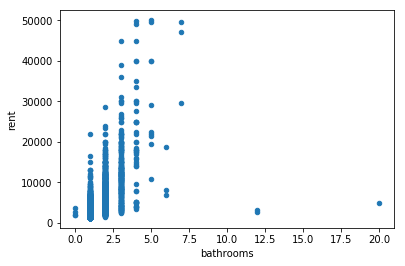

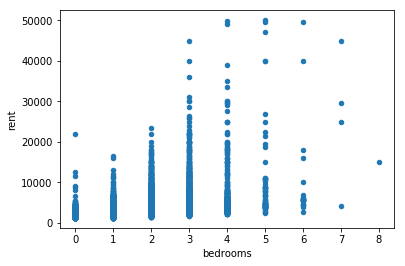

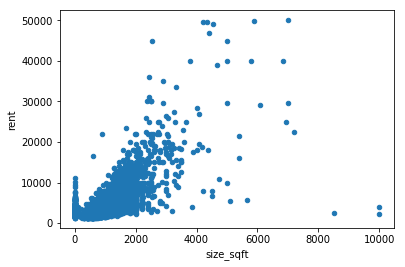

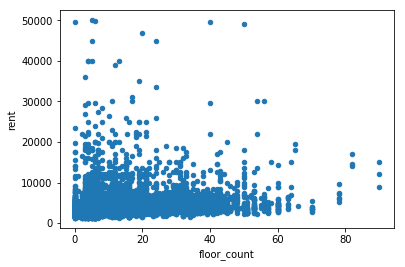

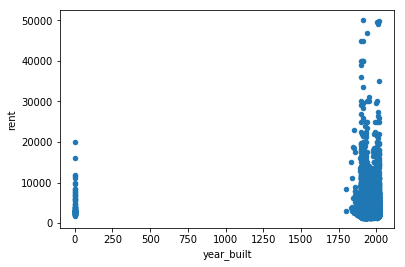

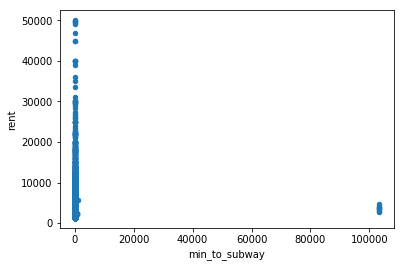

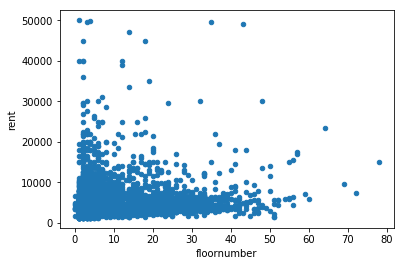

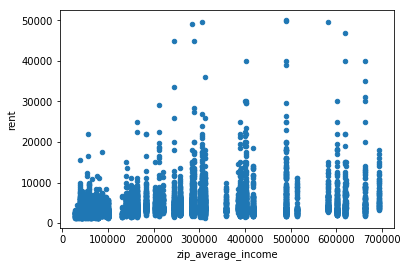

In [20]:
for feature in continuous_features:
    md_df.plot.scatter(feature, 'rent')

In [21]:
md_df[md_df['rent']>40000].count()

addr_unit                 8
building_id               8
bedrooms                  8
bathrooms                 8
size_sqft                 8
created_at                8
addr_street               8
addr_city                 8
addr_zip                  8
addr_lat                  8
addr_lon                  8
bin                       8
bbl                       8
floor_count               8
year_built                8
min_to_subway             8
has_doorman               8
has_elevator              8
has_fireplace             8
has_dishwasher            8
is_furnished              8
has_gym                   8
allows_pets               8
has_washer_dryer          8
has_garage                8
has_roofdeck              8
has_concierge             8
has_pool                  8
has_garden                8
has_childrens_playroom    8
rent                      8
no_fee                    8
description               8
neighborhood              8
borough                   8
unit                

**drop size_sqrt = 0 for now, since there are 713 rows, might replace with mode when creating models**

In [22]:
def remove_outliers(md_df, feature, low_value, high_value):
    print(feature, ': ', md_df.shape)
    md_df = md_df[md_df[feature]>low_value]
    md_df = md_df[md_df[feature]<=high_value]
    md_df.reset_index(drop=True,inplace=True)
    print(feature, ': ', md_df.shape)
    return md_df

md_df = remove_outliers(md_df, 'rent', 0, 40000)
md_df = remove_outliers(md_df, 'bathrooms', 0, 12)
md_df = remove_outliers(md_df, 'size_sqft', 0, 10000)
md_df = remove_outliers(md_df, 'year_built', 1700, 2019)
md_df = remove_outliers(md_df, 'min_to_subway', 0, 60)
md_df = remove_outliers(md_df, 'floornumber', 0, 60)

md_df['year_built'] = 2019 - md_df['year_built'].astype(int)

rent :  (12000, 39)
rent :  (11992, 39)
bathrooms :  (11992, 39)
bathrooms :  (11987, 39)
size_sqft :  (11987, 39)
size_sqft :  (11149, 39)
year_built :  (11149, 39)
year_built :  (11082, 39)
min_to_subway :  (11082, 39)
min_to_subway :  (10954, 39)
floornumber :  (10954, 39)
floornumber :  (10940, 39)


### Encode categorical feature and drop useless features

In [23]:
boroughs = np.array(md_df['borough'].unique())

for borough in boroughs:
    md_df[borough] = md_df['borough'].apply(lambda x : int(x == borough))
    raw_test_df[borough] = raw_test_df['borough'].apply(lambda x : int(x == borough))

features_notNeed = ['addr_unit', 'building_id', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'bin', 'bbl', 'description', \
                    'neighborhood', 'unit', 'borough', 'line']

md_df = md_df.drop(features_notNeed, axis=1)

### Use pair coorelation for continuous features

In [24]:
continuous_df = md_df[continuous_features+['rent']]
continuous_df.corr()['rent'][:-1]

bathrooms             0.640694
bedrooms              0.356034
size_sqft             0.687094
floor_count           0.260418
year_built           -0.108018
min_to_subway        -0.085295
floornumber           0.246378
zip_average_income    0.425890
Name: rent, dtype: float64

### Check coorelation for binary features

In [25]:
md_df[binary_features+['rent']].corr()['rent'][:-1]
coor_results= []

for feature in binary_features:
  df = raw_df.groupby([feature]).aggregate(['mean'])['rent']
  df[feature]= df.index
  coor_results.append(df.corr().iloc[0][1])
coor_df = pd.DataFrame({'Coorelation': coor_results,'Feature':binary_features})
coor_df


,Coorelation,Feature
0,1.0,has_doorman
1,1.0,has_elevator
2,1.0,has_fireplace
3,1.0,has_dishwasher
4,1.0,is_furnished
5,1.0,has_gym
6,1.0,allows_pets
7,1.0,has_washer_dryer
8,1.0,has_garage
9,1.0,has_roofdeck


As we can see in the correlation table, all binary features highly affected the rents. When we build the models, we should include all binary features.

# Build Models
 - We will be using cross validation to evaluate the performances of all our modles,and then deciding which should be the most suitable one, thus we will first create a function called get_cv_results to obtain the cv_performance.
 - we will try 5 different basic categorical models:`multiple regression, decision tree, random froest, Gradient Boosting Regression and Neural Network`

In [26]:
md_df = shuffle(md_df).reset_index(drop=True)


In [27]:
features = list(md_df.columns)
features.remove('rent')
k_fold = KFold(n_splits=10)

In [45]:
def get_cv_results(regressor):
    
    results = []
    for train, test in k_fold.split(md_df):
        regressor.fit(md_df.loc[train, features], md_df.loc[train, 'rent'])
        y_predicted = regressor.predict(md_df.loc[test, features])
        accuracy = mean_squared_error(md_df.loc[test, 'rent'], y_predicted)
        results.append(accuracy)

    return np.mean(results), np.std(results)

def get_test_result(regressor):
    regressor.fit(md_df[features], md_df['rent'])
    y_predicted = regressor.predict(raw_test_df[features])
    accuracy = mean_squared_error(raw_test_df['rent'], y_predicted)
    return accuracy

### Radnom Forest Model

In [29]:
rforest = RandomForestRegressor(
    random_state=11, 
    max_depth=10,
    n_estimators=200
)


In [37]:
# get_cv_results(rforest)

In [46]:
get_test_result(rforest)

1858636.6172359295

Now let's see how each features affected this model by checking the feature_importances

In [ ]:
rforest.fit(md_df[features], md_df['rent'])  
for feature,score in sorted(zip(features,rforest.feature_importances_), key=lambda x:x[1], reverse=True):
    print(feature, ' ', score)

### Multiple Regression
 - Multiple regression is an extension of simple linear regression. It is used when we want to predict the value of a variable based on the value of two or more other variables
 - We will based on p value to choose significant variables(p<0.1)
 

In [32]:
mul_reg_features = features[:]
x = md_df[features] 
y = md_df['rent']
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     915.6
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:15:51   Log-Likelihood:                -95322.
No. Observations:               10940   AIC:                         1.907e+05
Df Residuals:                   10910   BIC:                         1.909e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bedrooms                  91.8486     19.021      4.829      0.000      54.563     129.134
bathrooms               1146.9631     36.993     31.005      0.000    1074.449    1219.477
size_sqft                  2.8692      0.046     62.046      0.000       2.779       2.960
addr_lat                2424.8337    464.460      5.221      0.000    1514.408    3335.259
addr_lon               -6115.1872    549.597    -11.127      0.000   -7192.498   -5037.877
floor_count              -14.5776      2.377     -6.132      0.000     -19.237      -9.918
year_built                 0.1077      0.500      0.216      0.829      -0.872       1.087
min_to_subway            -22.2416      4.008     -5.549      0.000     -30.098     -14.385
has_doorman               97.9487     52.738      1.857      0.063      -5.427     201.325
has_elevator             346.8992     42.847      8.096      0.000     262.912     430.887
has_fireplace            514.5463     76.748      6.704      0.000     364.106     664.987
has_dishwasher          -169.9125     32.610     -5.210      0.000    -233.834    -105.991
is_furnished             642.6605     84.736      7.584      0.000     476.563     808.758
has_gym                  308.9891     53.330      5.794      0.000     204.453     413.525
allows_pets              141.6388     31.519      4.494      0.000      79.856     203.422
has_washer_dryer         330.3975     36.749      8.991      0.000     258.363     402.432
has_garage               -77.0545     44.103     -1.747      0.081    -163.505       9.396
has_roofdeck             164.7736     40.151      4.104      0.000      86.071     243.477
has_concierge            217.4513     54.452      3.993      0.000     110.716     324.187
has_pool                 131.2809     64.221      2.044      0.041       5.396     257.166
has_garden               -30.7361     44.280     -0.694      0.488    -117.532      56.060
has_childrens_playroom   103.8946     59.653      1.742      0.082     -13.036     220.826
no_fee                  -143.9022     32.151     -4.476      0.000    -206.923     -80.881
floornumber               21.7347      2.993      7.263      0.000      15.869      27.601
zip_average_income         0.0028      0.000     21.349      0.000       0.003       0.003
Brooklyn               -5.526e+05   5.03e+04    -10.986      0.000   -6.51e+05   -4.54e+05
Manhattan              -5.521e+05   5.03e+04    -10.970      0.000   -6.51e+05   -4.53e+05
Queens                 -5.525e+05   5.03e+04    -10.987      0.000   -6.51e+05   -4.54e+05
Bronx                  -5.533e+05   5.03e+04    -10.994      0.000   -6.52e+05   -4.55e+05
Staten Island          -5.542e+05   5.04e+04    -11.005      0.000   -6.53e+05   -4.55e+05
==============================================================================
O

- As we can see, variables has_garden and year_built have P value > 0.1
- After we remove these two variables, all P values are < 0.1

In [33]:
mul_reg_features.remove('has_garden')
mul_reg_features.remove('year_built')
x = md_df[mul_reg_features] 
y = md_df['rent']
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     983.5
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        23:15:55   Log-Likelihood:                -95322.
No. Observations:               10940   AIC:                         1.907e+05
Df Residuals:                   10912   BIC:                         1.909e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bedrooms                  92.1276     19.014      4.845      0.000      54.856     129.399
bathrooms               1146.8240     36.882     31.095      0.000    1074.529    1219.119
size_sqft                  2.8669      0.046     62.525      0.000       2.777       2.957
addr_lat                2410.9970    464.042      5.196      0.000    1501.391    3320.603
addr_lon               -6129.1056    547.925    -11.186      0.000   -7203.138   -5055.073
floor_count              -14.5928      2.344     -6.225      0.000     -19.188      -9.998
min_to_subway            -22.5215      3.983     -5.654      0.000     -30.329     -14.714
has_doorman               96.8769     52.692      1.839      0.066      -6.409     200.163
has_elevator             345.9685     42.171      8.204      0.000     263.306     428.631
has_fireplace            513.8390     76.593      6.709      0.000     363.702     663.976
has_dishwasher          -170.2842     32.585     -5.226      0.000    -234.156    -106.412
is_furnished             642.3644     84.640      7.589      0.000     476.454     808.275
has_gym                  307.4210     52.926      5.808      0.000     203.676     411.166
allows_pets              140.6244     31.468      4.469      0.000      78.941     202.308
has_washer_dryer         329.1386     36.470      9.025      0.000     257.651     400.627
has_garage               -80.2326     43.721     -1.835      0.067    -165.933       5.468
has_roofdeck             161.9933     39.693      4.081      0.000      84.188     239.799
has_concierge            214.6486     54.285      3.954      0.000     108.241     321.056
has_pool                 131.9775     64.209      2.055      0.040       6.116     257.838
has_childrens_playroom    96.9684     58.754      1.650      0.099     -18.201     212.137
no_fee                  -143.8134     32.147     -4.474      0.000    -206.827     -80.799
floornumber               21.7821      2.991      7.282      0.000      15.919      27.646
zip_average_income         0.0028      0.000     21.350      0.000       0.003       0.003
Brooklyn               -5.531e+05   5.02e+04    -11.014      0.000   -6.52e+05   -4.55e+05
Manhattan              -5.526e+05   5.02e+04    -10.998      0.000   -6.51e+05   -4.54e+05
Queens                  -5.53e+05   5.02e+04    -11.015      0.000   -6.51e+05   -4.55e+05
Bronx                  -5.538e+05   5.02e+04    -11.022      0.000   -6.52e+05   -4.55e+05
Staten Island          -5.547e+05   5.03e+04    -11.033      0.000   -6.53e+05   -4.56e+05
==============================================================================
Omnibus:                     8067.981   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2257173.382
Skew:                    

In [49]:
mul_reg = LinearRegression().fit(md_df[mul_reg_features], md_df['rent'])
get_cv_results(mul_reg)
get_test_result(mul_reg)

3179113.1729842736

## Gradient Boosting Regression
For the gradient boosting regressor we will first set up the hyperparameter max_depth=5 to avoid overfitting, will adjust more hyperparameter as we move on to improve the model


In [52]:
gbrdemo = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=100
)

get_cv_results(gbrdemo)


(940827.1123515966, 215452.55335952216)

In [53]:
get_test_result(gbrdemo)

1961258.5721124334

In [ ]:
gbrdemo = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=100
)

### Tuning Hyperparameters
Now let's use GridSearchCV form sci-kit learn model_selection to tune the hyperparameters, and find the most suitable one for our Gradient Boosting Regression model.The choices of hyperparameters are obtained from the toturial code, and since this function took a long time to process, we are considering reduce the amount of hyperpraramters for testing.

cited link: link: https://shankarmsy.github.io/stories/gbrt-sklearn.html

In [ ]:
# Tuning the hyperparameters based on a cross-validation subset (cv)
# cited link: link: https://shankarmsy.github.io/stories/gbrt-sklearn.html

def GradientBooster():
    
    param_grid={'n_estimators':[100],
            'learning_rate': [0.1, 0.05, 0.01],
            'max_depth':[4, 5, 6],
            'min_samples_leaf':[3, 5, 9],
           }
    
    # choose cross validation generator and use ShuffleSplit which randomly shuffles and selects Train and CV sets
    cv = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
    
    classifier = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=param_grid, n_jobs=4, cv=cv)
    
    classifier.fit(md_df[features], md_df['rent'])  
    return classifier.best_params_

In [ ]:
# Since this function takes too long to run, it will waste a lot of time during development,
# so we will just record the result for further usage. -----Runmin 11/18/19
"""
best_est=GradientBooster()

print("Best Estimator Parameters:")
print("n_estimators: ",best_est['n_estimators'])
print("max_depth: ", best_est['max_depth'])
print("Learning Rate: ", best_est['learning_rate'])
print("min_samples_leaf: ", best_est['min_samples_leaf'])
"""
print("Since this function takes too long to run, it will waste a lot of time during development,\
      \nso we will just record the result for further usage:")
print("\nBest Estimator Parameters:")
print("n_estimators: ",100)
print("max_depth: ", 6)
print("Learning Rate: ", 0.1)
print("min_samples_leaf: ", 3)

As we can see from the result above, we have found the suitable hyperparameters for our model, thus we can use them to check if a better result will be obtained.


In [ ]:
bettergbr1 = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    min_samples_leaf=3
)

get_cv_results(bettergbr1)

The mean squared error becomes unstable after applying the new set of hyperparameters, we've tried few test runs upon it, sometime the result get improved a lot but sometime it even makes the result worse, thus we might still be using the previous GradientBoosting regressor "gbrdemo" for a more stable prediction.

**Feature importances for Gradient Boosting Regression**

In [ ]:
gbrdemo.fit(md_df[features], md_df['rent'])  
for feature,score in sorted(zip(features,gbrdemo.feature_importances_), key=lambda x:x[1], reverse=True):
    print(feature, ' ', score)

##  Regression Tree Model
From definition, decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.
Thus, in our case when we do the regression tree model, we actually use the decision tree classifer.

Train the regression tree model using default paramater

In [ ]:
regtreemo = DecisionTreeRegressor(
    random_state=1, 
    max_depth=None,
    min_samples_leaf=1,
    max_features=None,
    max_leaf_nodes=None )

regtreemo.fit(md_df[features], md_df['rent'])

In [ ]:
get_cv_results(regtreemo)

Train the regression tree model using Hyperparameters that we found, so that we can compare the results among different models better.

In [ ]:
newregtreemo = DecisionTreeRegressor(
    random_state=1, 
    max_depth=6,
    min_samples_leaf=3 )

newregtreemo.fit(md_df[features], md_df['rent'])

In [ ]:
get_cv_results(newregtreemo)

As we can see, the regression tree model that uses the Hyperparameters does have better result.
But Gradient Boosting Regression still has the best result.

In [ ]:
for feature,score in zip(features,newregtreemo.feature_importances_):
    print(feature, ' ', score)

### Learning Curve
We can use the Learning Curves methods provided in lecture 8

In [ ]:
hp_values = range(1,50,2)
all_mu = []
all_sigma = []

for m in hp_values:

    dtree=DecisionTreeClassifier(
        criterion='entropy', 
        random_state=1, 
        max_depth=m,
        min_samples_leaf=m,
    )

    mu, sigma = get_cv_results(dtree)
    all_mu.append(mu)
    all_sigma.append(sigma)
    
    print(m, mu, sigma)

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(hp_values, all_mu)
plt.ylabel('Cross Validation Accuracy')
plt.xlabel('Max Depth')

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(hp_values, all_sigma)
plt.ylabel('Cross Validation Std Dev.')
plt.xlabel('Max Depth')

### Neural Network
Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input.(source:https://skymind.ai/wiki/neural-network)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(md_df[features])
Y = md_df['rent'].values.reshape(-1,1)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
net = models.Sequential()
net.add(layers.Dense(64, input_dim=train_x.shape[1], kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(128, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(1, activation='linear'))

net.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

In [ ]:
net.fit(train_x, train_y, epochs=70, batch_size=64, validation_split = 0.1)

In [ ]:
mean_squared_error(test_y, net.predict(test_x))

**Although the DL Neural Network seems to provide a better result on mean squared errors but it is really unstable** 

we have ran few test run on it, and each time it gives different results range from 853411.6171418771 to around 1,300,000.
Therefore, we might still choose Gradient Boosting Regression as the most suitable model, since it provides a overall better result.

# Model summary

In [ ]:
print('Random Forest Regression: ', get_cv_results(rforest))
print('Gradient Boosting Regression: ', get_cv_results(gbrdemo))
print('Multiple Regression: ', get_cv_results(mul_reg))
print('Decision Tree Regression: ', get_cv_results(newregtreemo))
print('Neural Network Regression: ', mean_squared_error(test_y, net.predict(test_x)))


### After explored 5 different regression models, we decided to use gradient boosting regression model to predict test2

In [ ]:
output = pd.DataFrame(np.array(raw_test2_df.index), columns=['rental_id'])

In [ ]:
output['predictions'] = gbrdemo.predict(raw_test2_df[features])

In [ ]:
output.head(10)

In [ ]:
output.to_csv('test2_prediction.csv')